In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip3 install seaborn

     |████████████████████████████████| 296kB 29.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
df = pd.read_csv('/data/ChurnPredictionLensdataprocessing_2022_01_24_22_09_05_983.csv')

In [5]:
df.shape

(7043, 20)

In [6]:
df.head(5).style.set_properties(**{'background-color':'black',
                                     'color': 'red'})

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


### Do note we have already
####  excluded Customer ID using Lens
####  converted totalcharges to integer
####  replaced blank values in totalcharges by Median
## using Refract Lens functionality.

In [8]:
df.describe(include=[np.number]).style.set_properties(**{'background-color':'black',
                                     'color': 'red'})

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.446969,0.265370
std,0.368612,24.559481,30.090047,2265.267532,0.441561
min,0.000000,0.000000,18.250000,18.000000,0.000000
25%,0.000000,9.000000,35.500000,401.500000,0.000000
50%,0.000000,29.000000,70.350000,1397.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.500000,1.000000
max,1.000000,72.000000,118.750000,8684.000000,1.000000


In [9]:
df.describe(include=[np.object]).style.set_properties(**{'background-color':'black',
                                     'color': 'red'})

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [10]:
df.corr().style.set_properties(**{'background-color':'black',
                                     'color': 'red'})

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
seniorcitizen,1.000000,0.016567,0.220173,0.102653,0.150889
tenure,0.016567,1.000000,0.247900,0.825465,-0.352229
monthlycharges,0.220173,0.247900,1.000000,0.650864,0.193356
totalcharges,0.102653,0.825465,0.650864,1.000000,-0.199038
churn,0.150889,-0.352229,0.193356,-0.199038,1.000000


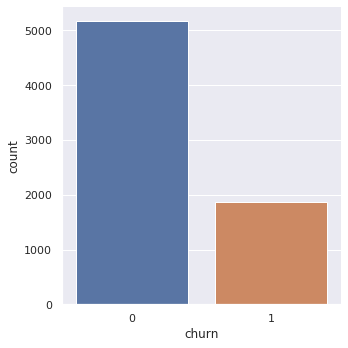

In [11]:
#Check the distribution of Churn {target class}
sns.catplot(x="churn", kind="count", data=df)

#### Let's check Impact of features on Monthly charges ####

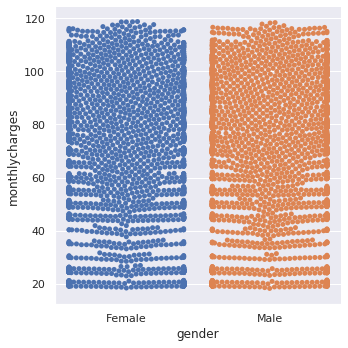

In [12]:
sns.catplot(x="gender", y="monthlycharges",kind="swarm", data=df)

#### No impact of gender on monthlycharges ####

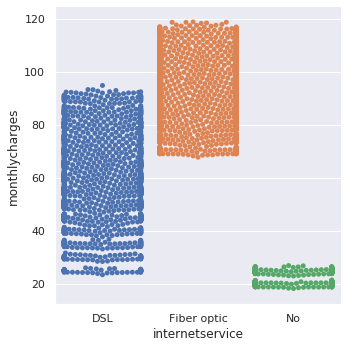

In [13]:
sns.catplot(x="internetservice", y="monthlycharges",kind="swarm", data=df)

#### FiberOptic leads to very high Monthly bills ####

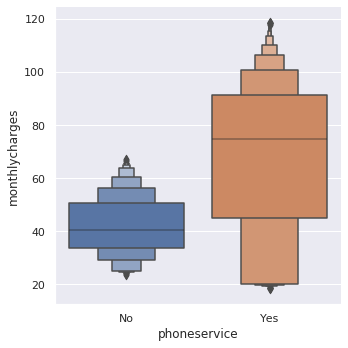

In [14]:
sns.catplot(x="phoneservice", y="monthlycharges",kind="boxen", data=df)

#### No Phone service leads to less monthly bills ####

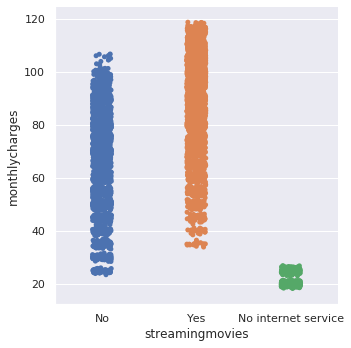

In [15]:
sns.catplot(x="streamingmovies", y="monthlycharges",kind="strip", data=df)

#### Streaming movies leads to higher monthly bills ####

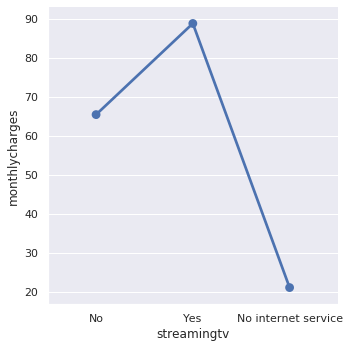

In [16]:
sns.catplot(x="streamingtv", y="monthlycharges",kind="point", data=df)

#### No Streaming connection leads to lower monthly bills

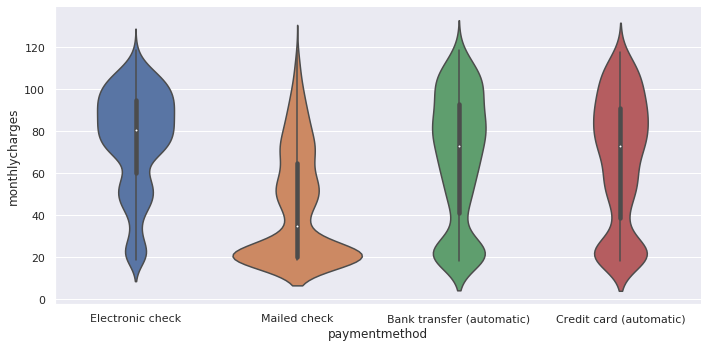

In [17]:
sns.catplot(x="paymentmethod", y="monthlycharges", kind="violin",
            data=df,aspect=2)

#### People Who Pay Using Mailed Checks Tend To Have Lower Monthly Bills
#### People Who Pay Using Bank Transfer And Credit Card Tend To Have Almost Equal Monthly Bills

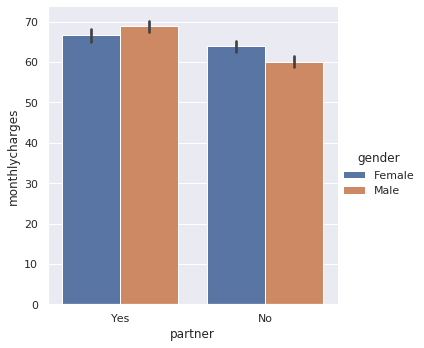

In [18]:
sns.catplot(x="partner", y="monthlycharges", hue="gender", kind="bar", data=df)

#### Men Tend To Have Significantly Higher Monthly Bills When Having A Partner
#### Women Tend To Have Higher Monthly Bills When Having A Partner, But Not As Higher As Men